<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_Bajas_Antiguedad_v6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cuantas serán las bajas voluntarias de los clientes fijos para un periodo x. (Agosto - Diciembre 2020)
 

In [214]:
import pandas as pd
import numpy as np

#Gráfico
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [215]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
data = pd.read_csv('/content/drive/My Drive/Dataset/BAJAS.txt',delimiter='~')
data = data[['MES_BAJA','GRUPO_ANTIGUEDAD','TOTAL_BAJAS']]
data = data.groupby(['MES_BAJA', 'GRUPO_ANTIGUEDAD']).agg({"MES_BAJA":'mean',"GRUPO_ANTIGUEDAD":'mean',"TOTAL_BAJAS":'mean'})
data['MES_BAJA']=round(data['MES_BAJA'] )
data['GRUPO_ANTIGUEDAD']=round(data['GRUPO_ANTIGUEDAD'] )

x  = data.iloc[:,:-1].values
y  = data.iloc[:,2]
y = y[:,np.newaxis]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


In [ ]:
data 

In [ ]:
data.info()
data.describe()

In [230]:
type(y)

numpy.ndarray

In [231]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(x, y,train_size = 0.2, random_state = 0)                                    

#Modelo regresión Logística
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_m1 = logreg.predict(x_test)
print('Precisión Modelo Regresión Logística')
print(logreg.score(x_train,y_train))

#Modelo vectores de soporte
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
y_predic_m2 = svc.predict(x_test)
print('Precisión Vectores de soporte')
print(svc.score(x_train,y_train))

 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

In [ ]:
x_train

In [10]:
logReg = LogisticRegression()
logReg.fit(x_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
# 1trim
#entrenamos datos
x1 = X[:,0]
x1 = x1[:,np.newaxis]
y1 = X[:,1]
y1 = y1[:,np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(x1, y1,train_size = 0.2,
                                        random_state = 0,
                                        shuffle      = True
                                    )
#escalamos los datos
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train)
x_test = sc_x.fit_transform(x_test)
y_test= sc_y.fit_transform(y_test)

#aplicando modelo svm
svr= SVR(kernel='rbf',degree=3, C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
x_valor=sc_x.inverse_transform(x_train)
y_valor= sc_y.inverse_transform(y_train)
y_predic_valor= sc_y.inverse_transform(svr.predict(x_train))
y_predic_valor

array([50.22790588, 56.20731471, 46.7959962 , 53.2532425 , 47.68568031,
       48.01223936, 57.85042515, 50.38472232, 54.42429761])

In [ ]:
pd.DataFrame(y_valor)

,0
0,51.742380
1,60.714196
2,45.282673
3,54.254488
4,40.258456
5,47.435908
6,58.560960
7,48.871399
8,65.379540


In [ ]:
x_valor_t=sc_x.inverse_transform(x_test)
y_valor_t= sc_y.inverse_transform(y_test)
y_predic_valor_t= sc_y.inverse_transform(svr.predict(x_test))
y_predic_valor_t

array([57.51431081, 49.55979001, 54.71690563])

In [ ]:
pd.DataFrame(y_valor_t)

,0
0,59.5
1,42.0
2,56.0


In [ ]:
#score
print(svr.score(x_train,y_train))
print(svr.score(x_test,y_test))

0.6030973523074987
0.634170741910758


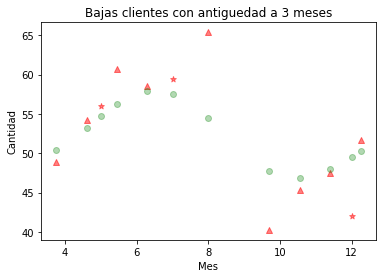

In [ ]:
plt.scatter(x_valor, y_valor, c='red', marker='^', alpha=0.5)
plt.scatter(x_valor_t , y_valor_t , c='red', marker='*', alpha=0.5)
plt.scatter(x_valor, y_predic_valor, c='green', marker='o', alpha=0.3)
plt.scatter(x_valor_t , y_predic_valor_t , c='green', marker='o', alpha=0.3)
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Bajas clientes con antiguedad a 3 meses')
plt.show()

In [ ]:
#Guardamos los resultados
concat_y1, concat_x1 = [],[]

for _ in list(range(len(y_predic_valor))):
  concat_y1.append(y_predic_valor[_])
  concat_x1.append(x_valor[_])

for _ in list(range(len(y_predic_valor_t))):
  concat_y1.append(y_predic_valor_t[_])
  concat_x1.append(x_valor_t[_])